In [2]:
%matplotlib inline
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['font.size'] = 16
import numpy as np
import os
import pandas as pd
import seaborn as sns
from keras.applications import xception
from keras.preprocessing import image
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm import tqdm
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

srart = dt.datetime.now()


Using TensorFlow backend.


In [3]:
!dir data\train\

 驱动器 E 中的卷没有标签。
 卷的序列号是 6C53-F43D

 E:\gao\pythonvir\jupyter\PlantSeedlingsClassification\data\train 的目录

2018/08/05  19:51    <DIR>          .
2018/08/05  19:51    <DIR>          ..
2018/06/20  07:14            19,863 sample_submission.csv
2018/08/05  19:52    <DIR>          train
2018/06/20  07:12     1,718,530,069 train.zip
               2 个文件  1,718,549,932 字节
               3 个目录 168,832,569,344 可用字节


In [4]:
!dir data\test\

 驱动器 E 中的卷没有标签。
 卷的序列号是 6C53-F43D

 E:\gao\pythonvir\jupyter\PlantSeedlingsClassification\data\test 的目录

2018/08/05  19:51    <DIR>          .
2018/08/05  19:51    <DIR>          ..
2018/08/05  19:51    <DIR>          test
2018/06/20  07:12        90,141,460 test.zip
               1 个文件     90,141,460 字节
               3 个目录 168,832,569,344 可用字节


In [5]:
CATEGORIES = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent',
              'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
NUM_CATEGORIES = len(CATEGORIES)

In [6]:
print(NUM_CATEGORIES)

12


In [7]:
data_dir = "data\\"
train_dir = os.path.join(data_dir ,'train\\train')
test_dir = os.path.join(data_dir ,'test\\test')
sample_submission = pd.read_csv(os.path.join(data_dir ,'train/sample_submission.csv'))

In [8]:
sample_submission.head(2)

,file,species
0,0021e90e4.png,Sugar beet
1,003d61042.png,Sugar beet


In [9]:
for category in CATEGORIES:
    print('{} {} images'.format(category , len(os.listdir(os.path.join(train_dir , category)))))

Black-grass 263 images
Charlock 390 images
Cleavers 287 images
Common Chickweed 611 images
Common wheat 221 images
Fat Hen 475 images
Loose Silky-bent 654 images
Maize 221 images
Scentless Mayweed 516 images
Shepherds Purse 231 images
Small-flowered Cranesbill 496 images
Sugar beet 385 images


In [10]:
train = []
for category_id ,category in enumerate(CATEGORIES):
    for file in os.listdir(os.path.join(train_dir ,category)):
        train.append(['{}\\{}\\{}'.format(train_dir ,category ,file) , category_id ,category])
train = pd.DataFrame(train ,columns = ['file' ,'category_id' ,'category' ])
train.head(2)
train.shape

,file,category_id,category
0,data\train\train\Black-grass\0050f38b3.png,0,Black-grass
1,data\train\train\Black-grass\0183fdf68.png,0,Black-grass


(4750, 3)

In [11]:
SAMPLE_PER_CATEGORY = 200
SEED = 1987
train = pd.concat([train[train['category'] == c][:SAMPLE_PER_CATEGORY] for c in CATEGORIES])
train = train.sample(frac = 1) #抽样筛选
train.index = np.arange(len(train))
train.head(2)
train.shape

,file,category_id,category
0,data\train\train\Fat Hen\149dbba5f.png,5,Fat Hen
1,data\train\train\Small-flowered Cranesbill\381...,10,Small-flowered Cranesbill


(2400, 3)

In [12]:
test = []
for file in os.listdir(test_dir):
    test.append(['{}\\{}'.format(test_dir ,file) , file])
test = pd.DataFrame(test ,columns = ['filepath','file'])
test.head(2)
test.shape

,filepath,file
0,data\test\test\0021e90e4.png,0021e90e4.png
1,data\test\test\003d61042.png,003d61042.png


(794, 2)

In [13]:
def read_img(filepath, size):
    img = image.load_img(filepath, target_size=size)
    img = image.img_to_array(img)
    return img

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

Text(250,112,'Black-grass')

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

Text(250,112,'Charlock')

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

Text(250,112,'Cleavers')

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

Text(250,112,'Common Chickweed')

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

Text(250,112,'Common wheat')

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

Text(250,112,'Fat Hen')

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

Text(250,112,'Loose Silky-bent')

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

Text(250,112,'Maize')

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

Text(250,112,'Scentless Mayweed')

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

Text(250,112,'Shepherds Purse')

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

Text(250,112,'Small-flowered Cranesbill')

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

(-0.5, 243.5, 243.5, -0.5)

Text(250,112,'Sugar beet')

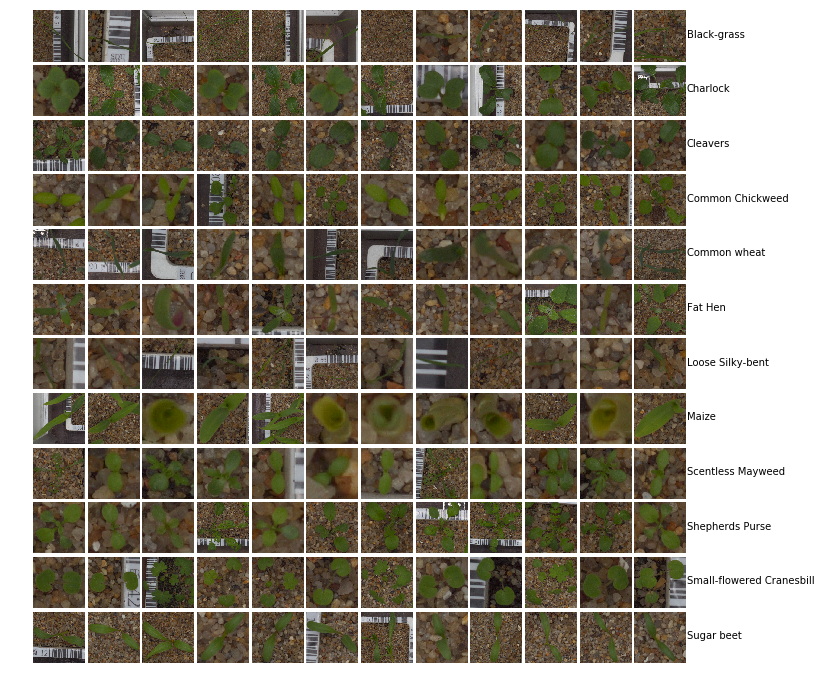

In [14]:
fig = plt.figure(1 , figsize = (NUM_CATEGORIES , NUM_CATEGORIES))
grid = ImageGrid(fig , 111 ,nrows_ncols = (NUM_CATEGORIES ,NUM_CATEGORIES) ,axes_pad = 0.05)
i =0
for catagory_id , category in enumerate(CATEGORIES):
    for filepath in train[train['category'] == category]['file'].values[:NUM_CATEGORIES]:
        ax = grid[i]
        img = read_img(filepath ,(244 ,244))
        ax.imshow(img/255.)
        ax.axis('off')
        if i % NUM_CATEGORIES == NUM_CATEGORIES - 1:
            ax.text(250, 112, filepath.split("\\")[-2], verticalalignment='center')
        i +=1
plt.show()
        


In [15]:
np.random.seed(seed = SEED)
rnd = np.random.random(len(train))
train_idx = rnd < 0.8
valid_idx = rnd >= 0.8
ytr = train.loc[train_idx, 'category_id'].values
yv = train.loc[valid_idx, 'category_id'].values
len(ytr), len(yv)

(1899, 501)

In [16]:
INPUT_SIZE = 299
POOLING = 'avg'
x_train = np.zeros((len(train), INPUT_SIZE, INPUT_SIZE, 3), dtype='float32')
for i, file in tqdm(enumerate(train['file'])):
    img = read_img(file, (INPUT_SIZE, INPUT_SIZE))
    x = xception.preprocess_input(np.expand_dims(img.copy() , axis = 0))
    x_train[i] = x
print('Train Images shape:{} size:{:,}'.format(x_train.shape,x_train.size))

2400it [00:33, 71.14it/s]


Train Images shape:(2400, 299, 299, 3) size:643,687,200


In [ ]:
Xtr = x_train[train_idx]
Xv = x_train[valid_idx]
print((Xtr.shape, Xv.shape, ytr.shape, yv.shape))
xception_bottleneck = xception.Xception(weights='imagenet', include_top=False, pooling=POOLING)
train_x_bf = xception_bottleneck.predict(Xtr, batch_size=32, verbose=1)
valid_x_bf = xception_bottleneck.predict(Xv, batch_size=32, verbose=1)
print('Xception train bottleneck features shape: {} size: {:,}'.format(train_x_bf.shape, train_x_bf.size))
print('Xception valid bottleneck features shape: {} size: {:,}'.format(valid_x_bf.shape, valid_x_bf.size))

((1899, 299, 299, 3), (501, 299, 299, 3), (1899,), (501,))
